In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.patches as patches
from matplotlib.font_manager import FontProperties
import matplotlib.patches as mpatches
import matplotlib.transforms as transforms

In [2]:
from premise.geomap import Geomap

# 1. Import data

In [3]:
df_SPS1_NPi = pd.read_parquet('LCA results/results_SSP2-NPi-SPS1.gzip')
df_SPS1_PkBudg500 = pd.read_parquet('LCA results/results_SSP2-PkBudg500-SPS1.gzip')
df_SPS1_Budg1150 = pd.read_parquet('LCA results/results_SSP2-PkBudg1150-SPS1.gzip')

df_SPS4_NPi = pd.read_parquet('LCA results/results_SSP2-NPi-SPS4.gzip')
df_SPS4_PkBudg500 = pd.read_parquet('LCA results/results_SSP2-PkBudg500-SPS4.gzip')
df_SPS4_Budg1150 = pd.read_parquet('LCA results/results_SSP2-PkBudg1150-SPS4.gzip')

# 2. Transform data - Group by activity_category

In [4]:
scenarios = [
    # (df_SPS1_NPi, 'SSP2-NPi-SPS1'),
    # (df_SPS1_PkBudg500, 'SSP2-PkBudg500-SPS1'),
    (df_SPS1_Budg1150, 'SSP2-Budg1150-SPS1'),
    # (df_SPS4_NPi, 'SSP2-NPi-SPS4'),
    # (df_SPS4_PkBudg500, 'SSP2-PkBudg500-SPS4'),
    # (df_SPS4_Budg1150, 'SSP2-Budg1150-SPS4')
]

In [5]:
# Define the demand groups
groups_demand = {
    'Transport ': [
        'FE_bus_diesel', 'FE_cars_diesel', 'FE_cars_gasoline', 'FE_coach_diesel',
        'FE_heavy_duty_truck_diesel', 'FE_heavy_duty_truck_gas', 'FE_light_duty_truck_diesel',
        'FE_light_duty_truck_gasoline', 'FE_motorcycle_gasoline', 'FE_other_transport_diesel', 
        'FE_other_transport_gasoline',
    
        'FE_cars_hydrogen', 'FE_heavy_duty_truck_hydrogen', 'FE_light_duty_truck_hydrogen',
    
        'FE_bus_electricity', 'FE_cars_electricity', 'FE_heavy_duty_truck_electricity',
        'FE_light_duty_truck_electricity', 'FE_other_transport_electric', 'FE_tram', 'FE_trolleybus'
    ],
    'Industry': [
        'FE_industry_heat_CHP_gas', 'FE_industry_heat_CHP_oil',
        'FE_industry_heat_CHP_waste_non_renew', 'FE_industry_heat_CHP_waste_non_renew_CCS',
        'FE_industry_process_coal', 'FE_industry_process_heavy_fuel_oil',
        'FE_industry_process_light_fuel_oil', 'FE_industry_process_natural_gas', 
        'FE_industry_process_waste_non_renew', 'FE_industry_heat_DH',
    

        'FE_industry_process_FE_other_electric', 'FE_industry_process_electric_boiler', 
        'FE_industry_process_heat_pump', 'FE_industry_heat_CHP_hydrogen', 'FE_industry_process_hydrogen',
        

        'FE_industry_heat_CHP_wood', 'FE_industry_heat_CHP_wood_CCS', 'FE_industry_process_pellet',
        'FE_industry_process_wood',
    ],
    'Residential heating': [
        'FE_residential_space_heating_CHP_gas', 'FE_residential_space_heating_gas',
        'FE_residential_space_heating_light_fuel_oil', 'FE_residential_water_heating_gas',
        'FE_residential_water_heating_light_fuel_oil', 'FE_residential_space_heating_heat_pump_gas',
        'FE_residential_water_heating_heat_pump_gas', 'FE_residential_space_heating_DH',

    
        'FE_residential_space_heating_pellet', 'FE_residential_space_heating_wood',
        'FE_residential_water_heating_pellet', 'FE_residential_water_heating_wood',
        

    
        'FE_residential_water_heating_solar', 'FE_residential_space_heating_solar',

    
        'FE_residential_FE_other_electric', 'FE_residential_space_heating_electric_boiler',
        'FE_residential_space_heating_heat_pump',
        'FE_residential_water_heating_electric_boiler', 'FE_residential_water_heating_heat_pump',
    ],
    'Services': [
        'FE_services_CHP_gas', 'FE_services_light_fuel_oil', 'FE_services_natural_gas',


        'FE_services_DH',

    
        'FE_services_CHP_biogas', 'FE_services_pellet', 'FE_services_wood',

    
        'FE_services_FE_other_electric', 'FE_services_electric_boiler',
        'FE_services_heat_pump', 'FE_services_solar'
    ],
}

# Create a mapping dictionary
variable_to_group = {variable: group for group, variables in groups_demand.items() for variable in variables}

In [6]:
activity_categories = {
    'Transport': [
        'Sea and coastal freight water transport',
        'Inland freight water transport',
        'Freight air transport',
        'Transport via pipeline',
        'Other transportation support activities',
        'Freight rail transport',
        'Freight transport by road',
        'Urban and suburban passenger land transport',
        'Other passenger land transport',
        'Other land transport',
    ],
    'Electricity generation': [
        'Electricity gas steam and air conditioning supply',
        'Electric power generation transmission and distribution',
        'Manufacture of gas distribution of gaseous fuels through mains',
        
    ],
    'Heat production':[
        'Steam and air conditioning supply'
    ],
    'Agriculture and forestry': [
        'Processing and preserving of fruit and vegetables',
        'Growing of cereals except rice leguminous crops and oil seeds',
        'Logging',
        'Growing of vegetables and melons roots and tubers',
        'Gathering of nonwood forest products',
        'Plant propagation',
        'Support activities for animal production',
        'Postharvest crop activities',
        'Growing of other tree and bush fruits and nuts',
        'Support activities for crop production',
        'Growing of oleaginous fruits',
        'Growing of other perennial crops',
        'Growing of sugar cane',
        'Growing of other nonperennial crops',
        'Seed processing for propagation',
        'Growing of tropical and subtropical fruits',
        'Growing of fibre crops',
        'Growing of rice',
        'Raising of cattle and buffaloes',
        'Marine fishing',
        'Manufacture of grain mill products',
        'Manufacture of dairy products',
        'Manufacture of prepared animal feeds',
        'Manufacture of starches and starch products',
        'Manufacture of vegetable and animal oils and fats',
        'Manufacture of sugar',
        'Processing and preserving of fish crustaceans and molluscs',
        'Silviculture and other forestry activities',
        'Growing of grapes',
        'Growing of beverage crops',
    ],
    'Synthetic fuel production':[
        'Manufacture of synthetic fuels',
    ],
    'Manufacturing and industry': [
        'Manufacture of batteries and accumulators',
        'Manufacture of nonmetallic mineral products nec',
        'Manufacture of refractory products',
        'Manufacture of chemicals and chemical products',
        'Manufacture of fertilizers and nitrogen compounds',
        'Manufacture of tanks reservoirs and containers of metal',
        'Plumbing heat and air conditioning installation',
        'Manufacture of ovens furnaces and furnace burners',
        'Manufacture of clay building materials',
        'Manufacture of other electronic and electric wires and cables',
        'Manufacture of computers and peripheral equipment',
        'Manufacture of parts and accessories for motor vehicles',
        'Manufacture of other fabricated metal products nec',
        'Manufacture of machinery for metallurgy',
        'Sawmilling and planing of wood',
        'Manufacture of other electrical equipment',
        'Manufacture of other general purpose machinery',
        'Manufacture of other chemical products nec',
        'Manufacture of corrugated paper and paperboard and of containers of paper and paperboard',
        'Manufacture of pulp paper and paperboard',
        'Manufacture of basic precious and other nonferrous metals',
        'Manufacture of builders carpentry and joinery',
        'Manufacture of other nonmetallic mineral products nec',
        'Manufacture of plastics and synthetic rubber in primary forms',
        'Manufacture of paints varnishes and similar coatings printing ink and mastics',
        'Manufacture of agricultural and forestry machinery',
        'Installation of industrial machinery and equipment',
        'Manufacture of glass and glass products',
        'Manufacture of motor vehicles',
        'Manufacture of other textiles nec',
        'Repair of electrical equipment',
        'Manufacture of other fabricated metal products metalworking service activities',
        'Manufacture of cement lime and plaster',
        'Preparation and spinning of textile fibres',
        'Manufacture of articles of concrete cement and plaster',
        'Manufacture of other articles of paper and paperboard',
        'Repair of transport equipment except motor vehicles',
        'Manufacture of other rubber products',
        'Manufacture of metalforming machinery and machine tools',
        'Manufacture of furniture',
        'Manufacture of other pumps compressors taps and valves',
        'Manufacture of electric motors generators transformers and electricity distribution',
        'Manufacture of veneer sheets and woodbased panels',
        'Manufacture of plastics products',
        'Weaving of textiles',
        'Manufacture of basic iron and steel',
        'Wholesale of solid liquid and gaseous fuels and related products',
        'Manufacture of engines and turbines except aircraft vehicle and cycle engines',
        'Manufacture of manmade fibres',
        'Manufacture of structural metal products',
        'Casting of nonferrous metals',
        'Manufacture of soap and detergents cleaning and polishing preparations perfumes and toilet preparations',
        'Manufacture of basic chemicals',
        'Manufacture of air and spacecraft and related machinery',
        'Treatment and coating of metals machining',
        'Maintenance and repair of motor vehicles',
        'Manufacture of corrugated paper and paperboard and of containers of paper a',
        'Manufacture of pesticides and other agrochemical products',
        'Manufacture of soap and detergents cleaning and polishing preparations pe',
        'Manufacture of electronic components and boards',
        'Manufacture of other fabricated metal products metalworking service activit',
        'Manufacture of refined petroleum products',
        'Manufacture of paints varnishes and similar coatings printing ink and mas',
        'Manufacture of other generalpurpose machinery',
        'Manufacture of engines and turbines except aircraft vehicle and cycle eng',
        'Manufacture of electric motors generators transformers and electricity di',
        'Manufacture of motorcycles'
    ],
    'Mining activities': [
        'Mining of iron ores',
        'Mining of uranium and thorium ores',
        'Mining of hard coal',
        'Extraction of salt',
        'Extraction of crude petroleum and natural gas',
        'Extraction of crude petroleum',
        'Mining of other nonferrous metal ores',
        'Extraction of peat',
        'Mining of lignite',
        'Quarrying of stone sand and clay',
        'Support activities for other mining and quarrying',
        'Mining of chemical and fertilizer minerals',
        'Extraction of natural gas',
        'Support activities for petroleum and natural gas extraction',
        'Treatment of tailings'
    ],
    'Infrastructure construction': [
        'Construction of buildings',
        'Construction of other civil engineering projects',
        'Construction of roads and railways',
        'Site preparation',
        'Construction of utility projects',
        'Other specialized construction activities',
        'Building of ships and floating structures',
        'Plumbing heat and airconditioning installation',
    ],
    'Waste treatment': [
        'Collection of nonhazardous waste',
        'Treatment and disposal of hazardous waste',
        'Treatment and disposal of nonhazardous waste',
        'Materials recovery',
        'Sewerage',
        'Water collection treatment and supply',
        'Remediation activities and other waste management services',
    ],
    'Carbon Capture': [
        'Carbon capture',
    ],
    'Other':[
        'Other',
    ]
}

# Create a mapping dictionary for the new activity categories
activity_to_category = {activity: category for category, activities in activity_categories.items() for activity in activities}

def map_activity_to_category(activity):
    category = activity_to_category.get(activity, 'Unclassified')
    if category == 'Unclassified':
        print(f"Activity '{activity}' not found in the category mapping.")
    return category

In [7]:
# Create an instance of Geomap
geomap_instance = Geomap('remind')

def custom_ecoinvent_to_iam_location(location):
    if location == "Europe, without Russia and TÃ¼rkiye":
        return "EUR"
    elif location == "CH":
        return "CH"
    else:
        try:
            iam_location = geomap_instance.ecoinvent_to_iam_location(location)
            if iam_location in ["EUR", "CH"]:
                return iam_location
            else:
                return "RoW"
        except KeyError as e:
            print(f"KeyError for location {location}: {e}")
            return "RoW"  # Default to RoW if not found

In [9]:
impact_categories = [
    'EF v3.1 EN15804 - climate change - global warming potential (GWP100)',
    'Crustal Scarcity Indicator 2020 - material resources: metals/minerals - crustal scarcity potential (CSP)',
    'ReCiPe 2016 v1.03, midpoint (H) - ecotoxicity: freshwater - freshwater ecotoxicity potential (FETP)',
    'selected LCI results - resource - land occupation',
    'ReCiPe 2016 v1.03, midpoint (H) - water use - water consumption potential (WCP)',
    'ReCiPe 2016 v1.03, midpoint (H) - particulate matter formation - particulate matter formation potential (PMFP)',
]

subplot_titles = {
    'EF v3.1 EN15804 - climate change - global warming potential (GWP100)':'a) Climate Change',
    'Crustal Scarcity Indicator 2020 - material resources: metals/minerals - crustal scarcity potential (CSP)':'b) Scarcity-weighted metals demand',
    'ReCiPe 2016 v1.03, midpoint (H) - ecotoxicity: freshwater - freshwater ecotoxicity potential (FETP)':'c) Ecotoxicity: Freshwater',
    'selected LCI results - resource - land occupation':'d) Land Use',
    'ReCiPe 2016 v1.03, midpoint (H) - water use - water consumption potential (WCP)':'e) Freshwater Use',
    'ReCiPe 2016 v1.03, midpoint (H) - particulate matter formation - particulate matter formation potential (PMFP)': 'f) Particulate Matter Formation',
}

In [10]:
processed_dfs = []

for scenario, scenario_name in scenarios:
    print(f'Processing {scenario_name}')
    for impact_category in impact_categories:
        print(f'Processing {impact_category}')
        filtered_scenario = scenario[scenario['impact_category'] == impact_category].copy()
        filtered_scenario['location'] = filtered_scenario['location'].apply(custom_ecoinvent_to_iam_location)
        filtered_scenario['act_category'] = filtered_scenario['act_category'].apply(map_activity_to_category)
        filtered_scenario['group'] = filtered_scenario['variable'].map(variable_to_group)
        filtered_scenario['scenario'] = scenario_name
        processed_dfs.append(filtered_scenario)

all_emissions = pd.concat(processed_dfs, ignore_index=True)
all_emissions['impact_category'] = all_emissions['impact_category'].replace(subplot_titles)

Processing SSP2-Budg1150-SPS1
Processing EF v3.1 EN15804 - climate change - global warming potential (GWP100)
Processing Crustal Scarcity Indicator 2020 - material resources: metals/minerals - crustal scarcity potential (CSP)
Processing ReCiPe 2016 v1.03, midpoint (H) - ecotoxicity: freshwater - freshwater ecotoxicity potential (FETP)
Processing selected LCI results - resource - land occupation
Processing ReCiPe 2016 v1.03, midpoint (H) - water use - water consumption potential (WCP)
Processing ReCiPe 2016 v1.03, midpoint (H) - particulate matter formation - particulate matter formation potential (PMFP)


In [11]:
all_emissions.impact_category.unique()

array(['a) Climate Change', 'b) Scarcity-weighted metals demand',
       'c) Ecotoxicity: Freshwater', 'd) Land Use', 'e) Freshwater Use',
       'f) Particulate Matter Formation'], dtype=object)

In [12]:
all_emissions.act_category.unique()

array(['Transport', 'Manufacturing and industry', 'Other',
       'Waste treatment', 'Electricity generation', 'Mining activities',
       'Agriculture and forestry', 'Infrastructure construction',
       'Carbon Capture', 'Heat production', 'Synthetic fuel production'],
      dtype=object)

In [13]:
all_emissions.group.unique()

array(['Transport ', 'Industry', 'Residential heating', 'Services'],
      dtype=object)

In [14]:
all_emissions.location.unique()

array(['EUR', 'CH', 'RoW'], dtype=object)

# 3. Visualization

## Creating the palette

In [15]:
# Set default font size for all plot elements
plt.rcParams.update({'font.size': 12, 'font.family': 'Verdana'})

In [16]:
custom_colors = {
    # ACTIVITY CATEGORIES
    'Agriculture and forestry': 'olivedrab',
    'Infrastructure construction': 'cadetblue',
    'Manufacturing and industry': 'rebeccapurple',
    'Electricity generation': 'saddlebrown',
    'Heat production':'orange',
    'Transport': 'royalblue',
    'Waste treatment': 'red',
    'Carbon Capture': 'pink',
    'Mining activities': 'gold',
    'Other': 'grey',
    'Synthetic fuel production':'lightgreen',

    # GROUPS
    'Transport ':'midnightblue',
    'Industry':'slateblue',
    'Residential heating':'lightsalmon',
    'Services':'mediumaquamarine',

    
    # Locations
    'Switzerland': '#C41919',
    'Europe': '#003399',
    'Rest of the World': 'grey'
}

In [17]:
hue_order_activity = [
    'Electricity generation',
    'Heat production',
    'Agriculture and forestry',
    'Manufacturing and industry',
    'Infrastructure construction',
    'Mining activities',
    'Synthetic fuel production',
    'Transport',
    'Carbon Capture', 
    'Other',
    'Waste treatment',
]

hue_order_location = [
    'Switzerland',
    'Europe',
    'Rest of the World',
]

hue_order_group = [
    'Industry',
    'Residential heating',
    'Services',
    'Transport '
]

In [18]:
label_mapping = {
    'CH': 'Switzerland',
    'EUR': 'Europe',
    'RoW': 'Rest of the World'
}

## Plotting

In [19]:
scenario_to_plot = 'SSP2-Budg1150-SPS1'

units_dict = {
    'a) Climate Change':'Mton CO$_2$-eq',
    'b) Scarcity-weighted metals demand':'Gton Si-eq',
    'c) Ecotoxicity: Freshwater': 'Mton 1,4-DCB-eq',
    'd) Land Use': 'square kilometer - year',
    'e) Freshwater Use': 'cubic kilometer',
    'f) Particulate Matter Formation':'kton PM$_{2.5}$-eq',
}

# Filter data for specified years and the scenario
years = [2020, 2030, 2040, 2050]

impact_categories = list(subplot_titles.values())

In [20]:
def add_label(ax, x, y, text):
    offset = transforms.ScaledTranslation(0, 0.03, ax.transAxes)
    ax.annotate(text, (x, y), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom', rotation=90, fontsize=12, color='black',
                bbox=dict(facecolor='white', edgecolor='none', pad=2.0), transform=ax.transData + offset)

In [23]:
# Convert values to billions if necessary (not all units might need this)
divisors_dict = {
    'a) Climate Change': 1e9,
    'b) Scarcity-weighted metals demand': 1e12,
    'c) Ecotoxicity: Freshwater': 1e9,
    'd) Land Use': 1e6,
    'e) Freshwater Use': 1e9,
    'f) Particulate Matter Formation': 1e6,
}

cutoff = 0

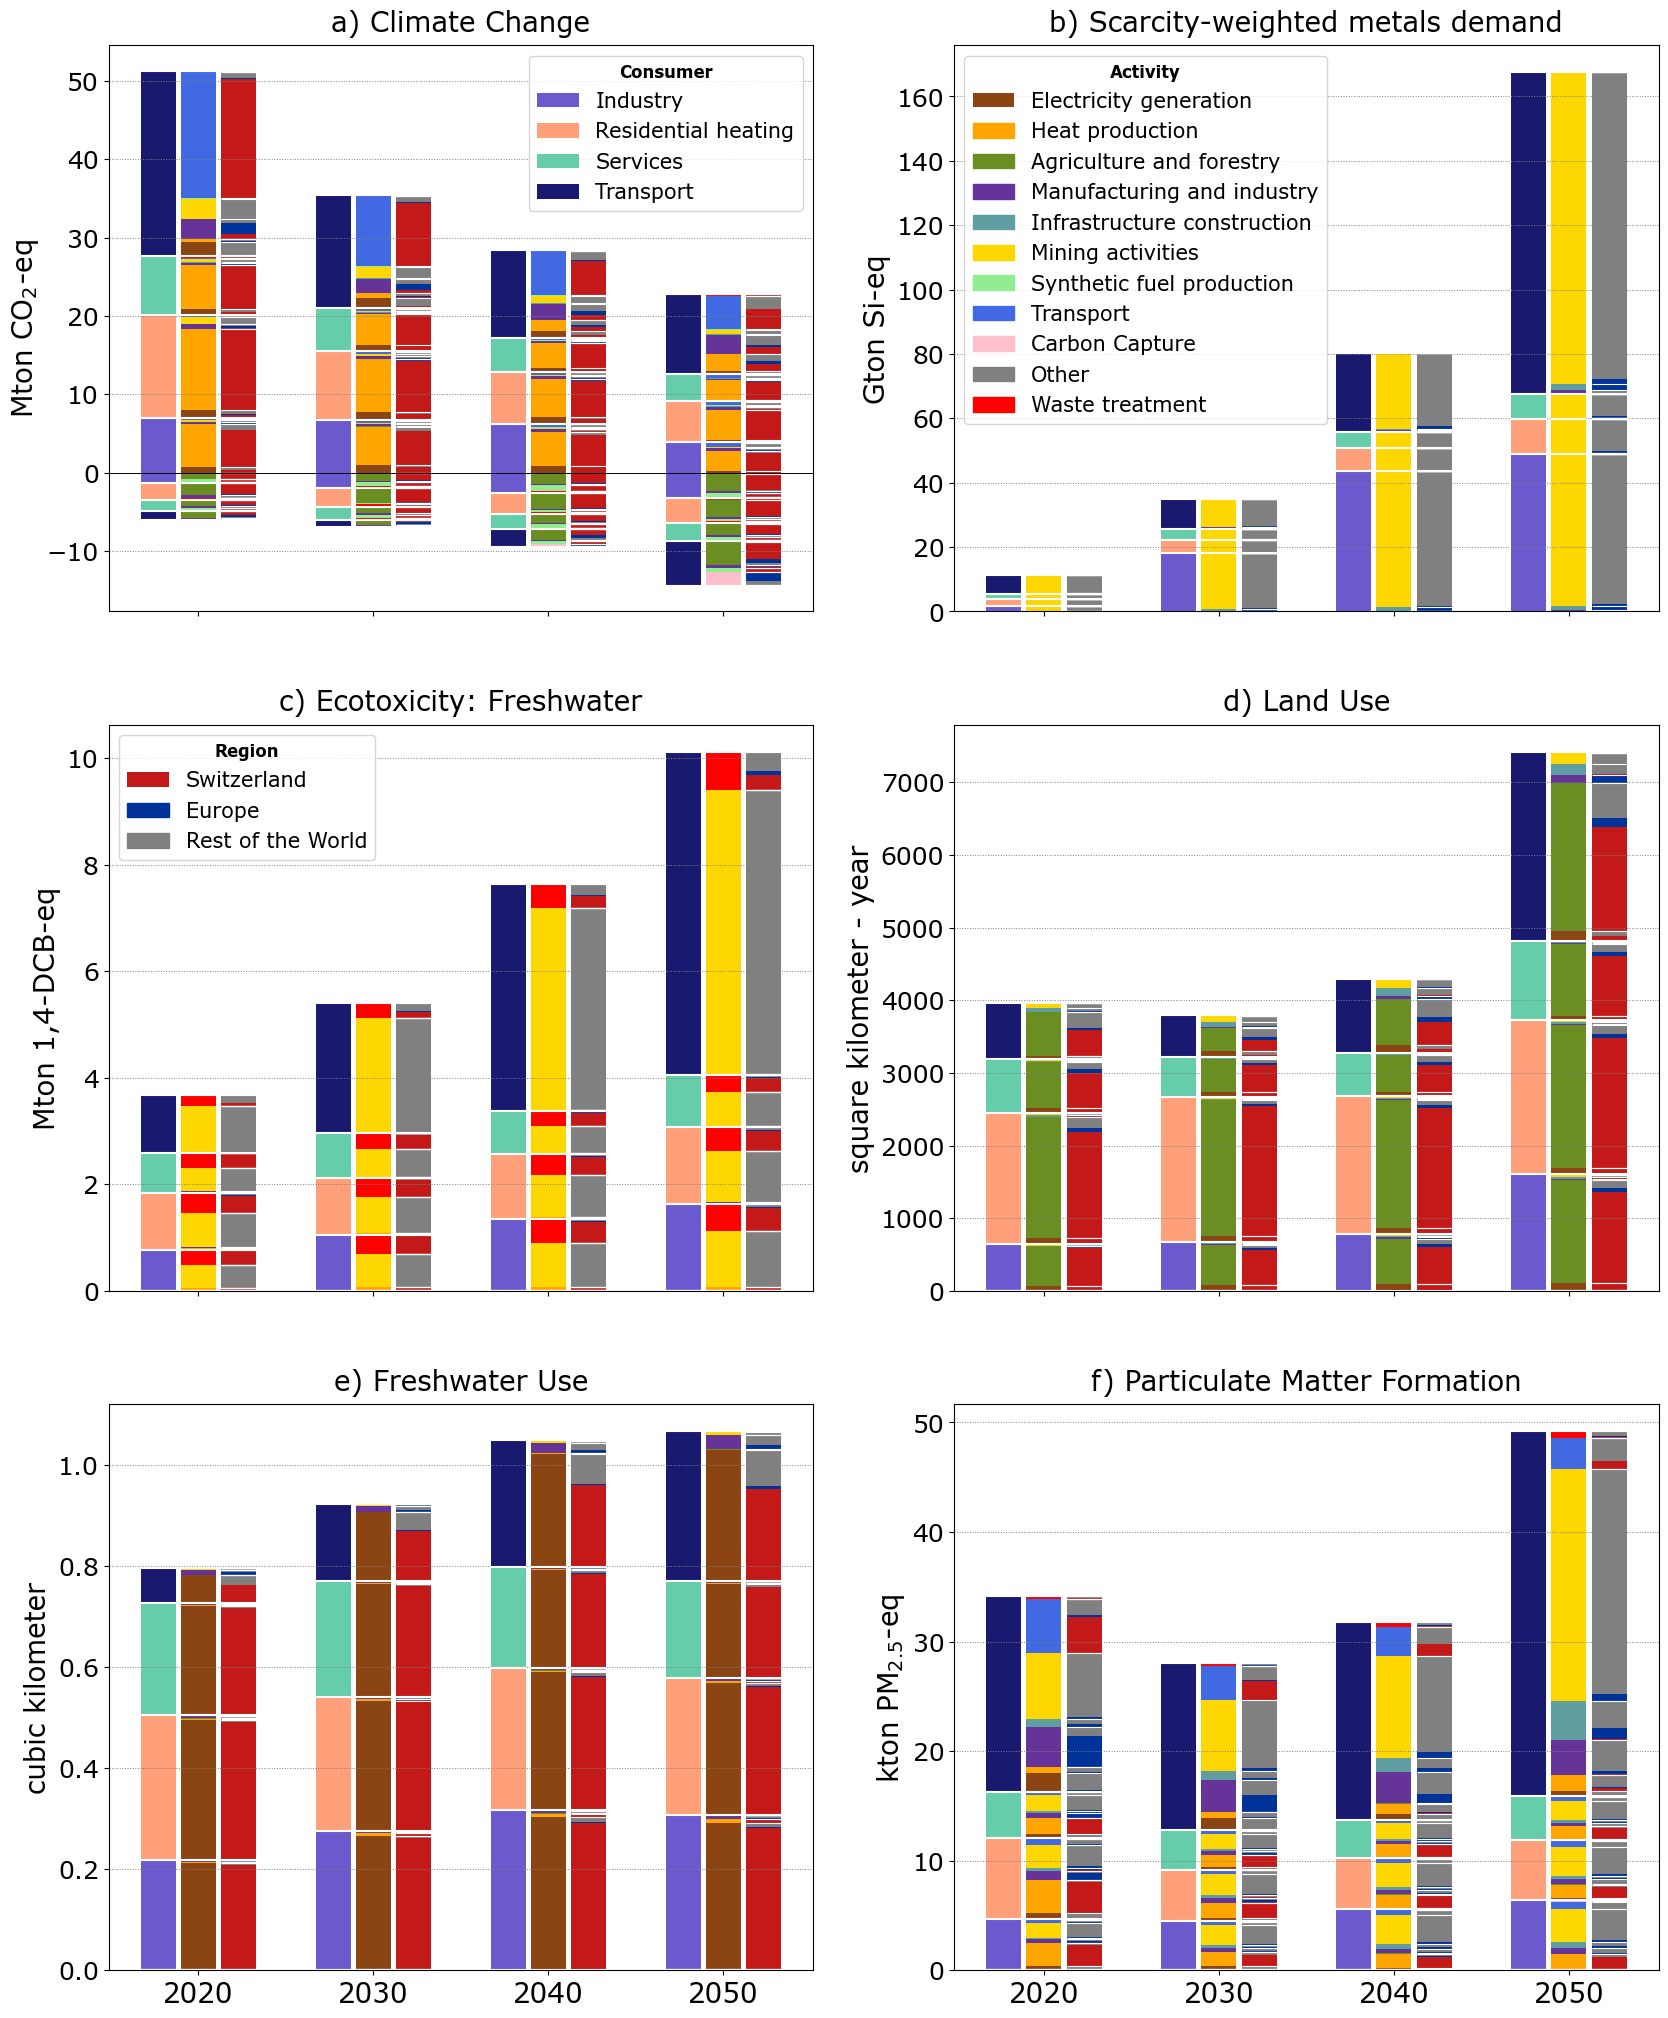

In [24]:
filtered_data = all_emissions[(all_emissions['year'].isin(years)) & (all_emissions['scenario'] == scenario_to_plot)].copy()
filtered_data['value'] = filtered_data.apply(lambda row: row['value'] / divisors_dict[row['impact_category']],axis=1)
filtered_data['location'] = filtered_data['location'].map(label_mapping)

# Separate positive and negative values
pos_data = filtered_data[filtered_data['value'] >= 0]
neg_data = filtered_data[filtered_data['value'] < 0]

# Group and sum the separated data by group
group_data_pos = pos_data.groupby(['year', 'impact_category', 'group'])['value'].sum().unstack().fillna(0).stack().reset_index(name='value')
group_data_neg = neg_data.groupby(['year', 'impact_category', 'group'])['value'].sum().unstack().fillna(0).stack().reset_index(name='value')

# Group and sum the separated data by group and act_category
act_category_data_pos = pos_data.groupby(['year', 'impact_category', 'group', 'act_category'])['value'].sum().unstack().fillna(0).stack().reset_index(name='value')
act_category_data_neg = neg_data.groupby(['year', 'impact_category', 'group', 'act_category'])['value'].sum().unstack().fillna(0).stack().reset_index(name='value')

# Group and sum the separated data by group, act_category, and location
location_data_pos = pos_data.groupby(['year', 'impact_category', 'group', 'act_category', 'location'])['value'].sum().unstack().fillna(0).stack().reset_index(name='value')
location_data_neg = neg_data.groupby(['year', 'impact_category', 'group', 'act_category', 'location'])['value'].sum().unstack().fillna(0).stack().reset_index(name='value')

# Create the figure and subplots
fig, axes = plt.subplots(3, 2, figsize=(20, 25), sharex=True)
bar_width = 0.5
spacing = 0.03 

# Function to create stacked bar plot with positive and negative values
def stacked_bar_plot(ax, data_pos, data_neg, category, hue_order, color_dict, bar_width=bar_width):
    unique_years = sorted(data_pos['year'].unique())
    width = bar_width / 2.5  # Adjust bar width for better visualization

    for i, year in enumerate(unique_years):
        subset_pos = data_pos[data_pos['year'] == year]
        subset_neg = data_neg[data_neg['year'] == year]
        bottom_pos = 0
        bottom_neg = 0
        x = i - width - spacing 
        for hue in hue_order:
            value_pos = subset_pos[subset_pos[category] == hue]['value'].sum()
            value_neg = subset_neg[subset_neg[category] == hue]['value'].sum()
            if value_pos > 0:
                ax.bar(x, value_pos, width, bottom=bottom_pos, label=hue if i == 0 else "", color=color_dict.get(hue, '#000000'))
                bottom_pos += value_pos
                # Add a horizontal line at the end of the category
                ax.hlines(bottom_pos, x - width / 2, x + width / 2, color='white', linewidth=1.5)
            if value_neg < 0:
                ax.bar(x, value_neg, width, bottom=bottom_neg, label=hue if i == 0 else "", color=color_dict.get(hue, '#000000'))
                bottom_neg += value_neg
                # Add a horizontal line at the end of the category
                ax.hlines(bottom_neg, x - width / 2, x + width / 2, color='white', linewidth=1.5)
        # add_label(ax, x, bottom_pos, 'Consumer')

# Function to create the middle bars for act_category
def act_category_bar_plot(ax, group_data_pos, group_data_neg, act_category_data_pos, act_category_data_neg, hue_order_activity, color_dict, bar_width=bar_width, cutoff=0.05, spacing=0):
    unique_years = sorted(group_data_pos['year'].unique())
    width = bar_width / 2.5

    for i, year in enumerate(unique_years):
        group_subset_pos = group_data_pos[group_data_pos['year'] == year]
        group_subset_neg = group_data_neg[group_data_neg['year'] == year]
        x_loc = i

        bottom_pos = 0
        bottom_neg = 0

        # Ensure the order of group is consistent
        for group in sorted(group_subset_pos['group'].unique(), key=lambda x: hue_order_group.index(x)):
            act_category_subset_pos = act_category_data_pos[(act_category_data_pos['year'] == year) & (act_category_data_pos['group'] == group)]
            act_category_subset_neg = act_category_data_neg[(act_category_data_neg['year'] == year) & (act_category_data_neg['group'] == group)]
            
            group_value_pos = group_subset_pos[group_subset_pos['group'] == group]['value'].sum()
            group_value_neg = group_subset_neg[group_subset_neg['group'] == group]['value'].sum()
            
            other_pos = 0
            other_neg = 0

            for act_category in hue_order_activity:
                value_pos = act_category_subset_pos[act_category_subset_pos['act_category'] == act_category]['value'].sum()
                value_neg = act_category_subset_neg[act_category_subset_neg['act_category'] == act_category]['value'].sum()

                if abs(value_pos) >= cutoff * abs(group_value_pos):
                    if value_pos > 0:
                        ax.bar(x_loc, value_pos, width, bottom=bottom_pos, label=act_category if (i == 0 and act_category == hue_order_activity[0]) else "", color=color_dict.get(act_category, '#000000'))
                        bottom_pos += value_pos
                else:
                    other_pos += value_pos
                
                if abs(value_neg) >= cutoff * abs(group_value_neg):
                    if value_neg < 0:
                        ax.bar(x_loc, value_neg, width, bottom=bottom_neg, label=act_category if (i == 0 and act_category == hue_order_activity[0]) else "", color=color_dict.get(act_category, '#000000'))
                        bottom_neg += value_neg
                else:
                    other_neg += value_neg

            # Add the 'Other' category for small contributions
            if other_pos != 0:
                ax.bar(x_loc, other_pos, width, bottom=bottom_pos, color='white')
                bottom_pos += other_pos
            if other_neg != 0:
                ax.bar(x_loc, other_neg, width, bottom=bottom_neg, color='white')
                bottom_neg += other_neg

            # Add horizontal lines at the end of the group for each year
            if bottom_pos != 0:
                ax.hlines(bottom_pos, x_loc - width / 2, x_loc + width / 2, color='white', linewidth=1.5)
            if bottom_neg != 0:
                ax.hlines(bottom_neg, x_loc - width / 2, x_loc + width / 2, color='white', linewidth=1.5)
        # add_label(ax, x_loc, bottom_pos, 'Activity')


def location_bar_plot(ax, group_data_pos, group_data_neg, act_category_data_pos, act_category_data_neg, loc_data_pos, loc_data_neg, hue_order_loc, color_dict, bar_width=bar_width, cutoff=0.05, spacing=0):
    unique_years = sorted(group_data_pos['year'].unique())
    width = bar_width / 2.5  # Adjust bar width for better visualization

    for i, year in enumerate(unique_years):
        group_subset_pos = group_data_pos[group_data_pos['year'] == year]
        group_subset_neg = group_data_neg[group_data_neg['year'] == year]
        x_loc = i + (width + spacing)  # Offset the x position for location bars

        bottom_pos = 0
        bottom_neg = 0

        # Ensure the order of group is consistent
        for group in sorted(group_subset_pos['group'].unique(), key=lambda x: hue_order_group.index(x)):
            act_category_subset_pos = act_category_data_pos[(act_category_data_pos['year'] == year) & (act_category_data_pos['group'] == group)]
            act_category_subset_neg = act_category_data_neg[(act_category_data_neg['year'] == year) & (act_category_data_neg['group'] == group)]

            group_value_pos = group_subset_pos[group_subset_pos['group'] == group]['value'].sum()
            group_value_neg = group_subset_neg[group_subset_neg['group'] == group]['value'].sum()

            other_pos = 0
            other_neg = 0

            # Ensure the order of act_category is consistent within each group
            for act_category in sorted(act_category_subset_pos['act_category'].unique(), key=lambda x: hue_order_activity.index(x)):
                loc_subset_pos = loc_data_pos[(loc_data_pos['year'] == year) & (loc_data_pos['group'] == group) & (loc_data_pos['act_category'] == act_category)]
                loc_subset_neg = loc_data_neg[(loc_data_neg['year'] == year) & (loc_data_neg['group'] == group) & (loc_data_neg['act_category'] == act_category)]

                act_value_pos = act_category_subset_pos[act_category_subset_pos['act_category'] == act_category]['value'].sum()
                act_value_neg = act_category_subset_neg[act_category_subset_neg['act_category'] == act_category]['value'].sum()

                if abs(act_value_pos) >= cutoff * abs(group_value_pos):
                    # Ensure the order of location is consistent within each act_category
                    for loc in hue_order_loc:
                        value_pos = loc_subset_pos[loc_subset_pos['location'] == loc]['value'].sum()
                        if value_pos > 0:
                            ax.bar(x_loc, value_pos, width, bottom=bottom_pos, label=loc if (i == 0 and loc == hue_order_loc[0]) else "", color=color_dict.get(loc, '#000000'))
                            bottom_pos += value_pos

                    # Add horizontal lines at the end of the act_category for each year
                    if bottom_pos != 0:
                        ax.hlines(bottom_pos, x_loc - width / 2, x_loc + width / 2, color='white', linewidth=0.8)

                else:
                    other_pos += act_value_pos

                if abs(act_value_neg) >= cutoff * abs(group_value_neg):
                    # Ensure the order of location is consistent within each act_category
                    for loc in hue_order_loc:
                        value_neg = loc_subset_neg[loc_subset_neg['location'] == loc]['value'].sum()
                        if value_neg < 0:
                            ax.bar(x_loc, value_neg, width, bottom=bottom_neg, label=loc if (i == 0 and loc == hue_order_loc[0]) else "", color=color_dict.get(loc, '#000000'))
                            bottom_neg += value_neg

                    # Add horizontal lines at the end of the act_category for each year
                    if bottom_neg != 0:
                        ax.hlines(bottom_neg, x_loc - width / 2, x_loc + width / 2, color='white', linewidth=0.8)

                else:
                    other_neg += act_value_neg

            # Add the 'Other' category for small contributions
            if other_pos != 0:
                ax.bar(x_loc, other_pos, width, bottom=bottom_pos, color='white')
                bottom_pos += other_pos
                # Add horizontal lines for the 'Other' category
                ax.hlines(bottom_pos, x_loc - width / 2, x_loc + width / 2, color='white', linewidth=0.8)
            if other_neg != 0:
                ax.bar(x_loc, other_neg, width, bottom=bottom_neg, color='white')
                bottom_neg += other_neg
                # Add horizontal lines for the 'Other' category
                ax.hlines(bottom_neg, x_loc - width / 2, x_loc + width / 2, color='white', linewidth=0.8)

            # Add a white bar at the end of each activity to align with act_category
            if bottom_pos != 0:
                ax.hlines(bottom_pos, x_loc - width / 2, x_loc + width / 2, color='white', linewidth=1.5)
            if bottom_neg != 0:
                ax.hlines(bottom_neg, x_loc - width / 2, x_loc + width / 2, color='white', linewidth=1.5)

        # add_label(ax, x_loc, bottom_pos, 'Region')

# Create each subplot for the impact categories
for idx, impact_category in enumerate(impact_categories):
    row, col = divmod(idx, 2)
    ax = axes[row, col]
    subset_pos_group = group_data_pos[group_data_pos['impact_category'] == impact_category]
    subset_neg_group = group_data_neg[group_data_neg['impact_category'] == impact_category]
    subset_pos_act_category = act_category_data_pos[act_category_data_pos['impact_category'] == impact_category]
    subset_neg_act_category = act_category_data_neg[act_category_data_neg['impact_category'] == impact_category]
    subset_pos_loc = location_data_pos[location_data_pos['impact_category'] == impact_category]
    subset_neg_loc = location_data_neg[location_data_neg['impact_category'] == impact_category]

    # Plot the group category bars on the left
    stacked_bar_plot(ax, subset_pos_group, subset_neg_group, 'group', hue_order_group, custom_colors, bar_width=bar_width)

    # Plot the act_category bars in the middle
    act_category_bar_plot(ax, subset_pos_group, subset_neg_group, subset_pos_act_category, subset_neg_act_category, hue_order_activity, custom_colors, bar_width=bar_width, cutoff=cutoff, spacing=spacing)

    # Plot the location bars on the right, stacked to match the height of the act_category bars
    location_bar_plot(ax, subset_pos_group, subset_neg_group, subset_pos_act_category, subset_neg_act_category, subset_pos_loc, subset_neg_loc, hue_order_location, custom_colors, bar_width=bar_width, cutoff=cutoff, spacing=spacing)

    ax.set_title(impact_category, fontsize=20, pad=10)
    ax.set_ylabel(units_dict[impact_category], fontsize=20)
    ax.tick_params(axis='y', labelsize=18)
    ax.tick_params(axis='x', labelsize=20)
    ax.set_xticks(range(len(years)))
    ax.set_xticklabels(years)
    ax.grid(True, which='both', axis='y', linestyle=':', color='grey', linewidth=0.7)
    ax.axhline(0, color='black', linewidth=0.7)

# Add legends at the bottom left and bottom right
handles_group, labels_group = [], []
handles_act_category, labels_act_category = [], []
handles_loc, labels_loc = [], []
for ax in axes.flatten():
    h, l = ax.get_legend_handles_labels()
    for handle, label in zip(h, l):
        if label in hue_order_group and label not in labels_group:
            handles_group.append(handle)
            labels_group.append(label)
        elif label in hue_order_activity and label not in labels_act_category:
            handles_act_category.append(handle)
            labels_act_category.append(label)
        elif label in hue_order_location and label not in labels_loc:
            handles_loc.append(handle)
            labels_loc.append(label)

# Ensure all locations are included in the legend
for loc in hue_order_location:
    if loc not in labels_loc:
        handles_loc.append(mpatches.Patch(color=custom_colors.get(loc, '#000000'), label=loc))
        labels_loc.append(loc)

# Ensure all locations are included in the legend
for act in hue_order_activity:
    if act not in labels_act_category:
        handles_act_category.append(mpatches.Patch(color=custom_colors.get(act, '#000000'), label=act))
        labels_act_category.append(act)

# fig.legend(handles_group, labels_group, loc='lower left', ncol=2, bbox_to_anchor=(0, -0.065), fontsize=18)
# fig.legend(handles_act_category, labels_act_category,ncol=2, loc='lower center', bbox_to_anchor=(0.5, -0.065), fontsize=18)
# fig.legend(handles_loc, labels_loc, loc='lower right', bbox_to_anchor=(0.9, -0.065), fontsize=18)

legend_loc = axes[1,0].legend(handles_loc,labels_loc,loc='upper left', fontsize=15)
legend_loc.set_title("Region", prop={'weight': 'bold'})

legend_group = axes[0,0].legend(handles_group, labels_group, loc='upper right', fontsize =15)
legend_group.set_title("Consumer", prop={'weight': 'bold'})

legend_act = axes[0, 1].legend(handles_act_category, labels_act_category, loc='upper left', fontsize=15)
legend_act.set_title("Activity", prop={'weight': 'bold'})

# plt.tight_layout()
plt.savefig('Figure_3.png', dpi=300, bbox_inches='tight')
plt.show()